# TEXT ENCRYPTION USING AES ALGORITHM 

# Flow of Algorithm:

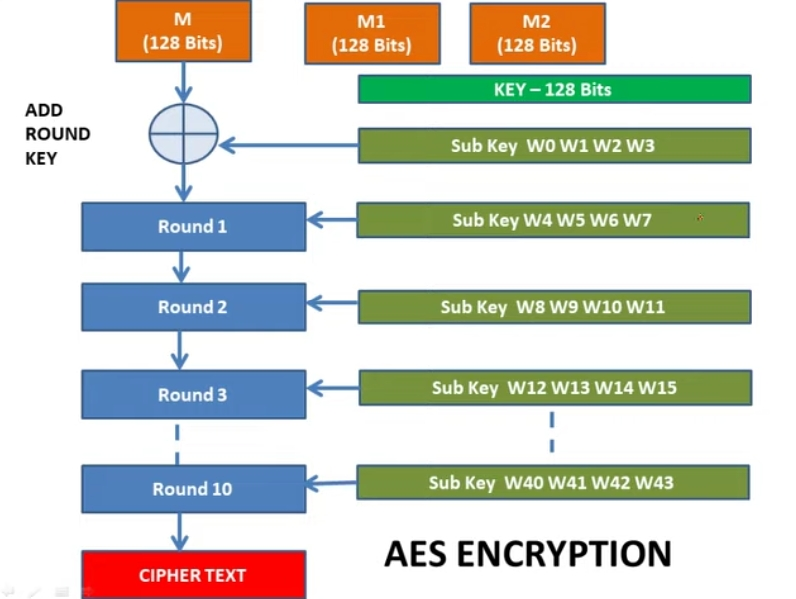

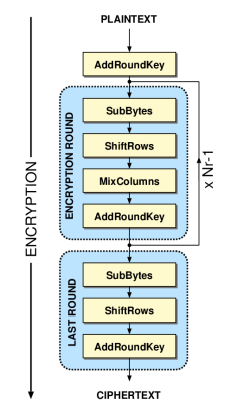

# Key Expansion

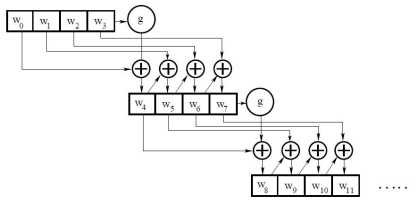

In [1]:
from tkinter import *
import tkinter as tk

def keyExpansion(key,numround,rci,s_box):
    round_const = rci[numround-1]
    gw3 = [key[3][1],key[3][2],key[3][3],key[3][0]] #rotword: lift shift by 1 byte
    for i in range(4):
        u = hex(s_box[int(gw3[i][2],16)][int(gw3[i][3],16)]) #sub_word using s_box
        if(u == "0x0"):
            u = "0x00"
        elif(len(u.lstrip("0x"))<=1):
            u = "0x0"+u.lstrip("0x")
        gw3[i] = u
    a = 1
    b = 1
    if(gw3[0] == "0x00" or gw3[0] == "0x0"):
        a = 0
    else:
        a = int(gw3[0].lstrip("0x"),16)  #(int) for gw3[0]
    x = hex(int(a^int(round_const.lstrip("0x"),16)))
    if(x == "0x0"):
        x = "0x00"
    elif(len(x.lstrip("0x"))<=1):
        x = "0x0"+x.lstrip("0x")
    gw3[0] = x
    w4 = []
    for i in range(4):
        r = 1
        p = 1
        if(gw3[i] == "0x00" or gw3[i] == "0x0"):
            r = 0
        else:
            r = int(gw3[i].lstrip("0x"),16)
        if(key[0][i] == "0x00" or key[0][i] == "0x0"):
            p = 0
        else:
            p = int(key[0][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w4.append(y)
    w5 = []
    w6 = []
    w7 = []
    for i in range(4):
        r = 1
        p = 1
        if(w4[i] == "0x00" or w4[i] == "0x0"):
            r = 0
        else:
            r = int(w4[i].lstrip("0x"),16)
        if(key[1][i] == "0x00" or key[1][i] == "0x0"):
            p = 0
        else:
            p = int(key[1][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w5.append(y)
    for i in range(4):
        r = 1
        p = 1
        if(w5[i] == "0x00" or w5[i] == "0x0"):
            r = 0
        else:
            r = int(w5[i].lstrip("0x"),16)
        if(key[2][i] == "0x00" or key[2][i] == "0x0"):
            p = 0
        else:
            p = int(key[2][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w6.append(y)
    for i in range(4):
        r = 1
        p = 1
        if(w6[i] == "0x00" or w6[i] == "0x0"):
            r = 0
        else:
            r = int(w6[i].lstrip("0x"),16)
        if(key[3][i] == "0x00" or key[3][i] == "0x0"):
            p = 0
        else:
            p = int(key[3][i].lstrip("0x"),16)
        y = hex(r^p)
        if(y == "0x0"):
            y = "0x00"
        elif(len(y.lstrip("0x")) <= 1):
            y = "0x0"+y.lstrip("0x")
        w7.append(y)
    return [w4,w5,w6,w7]

def addRoundKey(pt,rk):
    
    for i in range(4):
        for j in range(4):
            x = 0
            y = 0
            if(pt[j][i] != "0x00"):
                x = int(pt[j][i].lstrip('0x'),16)
            if(rk[j][i] != "0x00"):
                y = int(rk[j][i].lstrip('0x'),16)
            z = hex(x^y)
            if(z == "0x0"):
                z = "0x00"
            elif(len(z.lstrip("0x")) <= 1):
                z = "0x0"+z.lstrip("0x")
            pt[j][i] = z
    return pt  #initial state

def substitute(pt,s_box):
    for i in range(4):
        for j in range(4):
            u = hex(s_box[int(pt[i][j][2],16)][int(pt[i][j][3],16)])
            if(u == "0x0"):
                u = "0x00"
            elif(len(u.lstrip("0x"))<=1):
                u = "0x0"+u.lstrip("0x")
            pt[i][j] = u
    return pt

def shiftRow(pt):
    pt[0][1],pt[1][1],pt[2][1],pt[3][1] = pt[1][1],pt[2][1],pt[3][1],pt[0][1]
    pt[0][2],pt[1][2],pt[2][2],pt[3][2] = pt[2][2],pt[3][2],pt[0][2],pt[1][2]
    pt[0][3],pt[1][3],pt[2][3],pt[3][3] = pt[3][3],pt[0][3],pt[1][3],pt[2][3]
    return pt

def mixMulCol(col,mul2,mul3):
    temp = []
    i = mul2[int(col[0][2],16)][int(col[0][3],16)] #mul2 value = 36
    j = mul3[int(col[1][2],16)][int(col[1][3],16)]
    k = int(col[2],16) #0x63
    l = int(col[3],16) #0x63
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = int(col[0],16)
    j = mul2[int(col[1][2],16)][int(col[1][3],16)]
    k = mul3[int(col[2][2],16)][int(col[2][3],16)]
    l = int(col[3],16)
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = int(col[0],16)
    j = int(col[1],16)
    k = mul2[int(col[2][2],16)][int(col[2][3],16)]
    l = mul3[int(col[3][2],16)][int(col[3][3],16)]
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)

    i = mul3[int(col[0][2],16)][int(col[0][3],16)]
    j = int(col[1],16)
    k = int(col[2],16)
    l = mul2[int(col[3][2],16)][int(col[3][3],16)]
    m = hex(i^j^k^l)
    if(m == "0x0"):
        m = "0x00"
    elif(len(m.lstrip("0x")) <= 1):
        m = "0x0"+m.lstrip("0x")
    temp.append(m)
    return temp

def mixCol(mul2,mul3,pt):
    res = []
    print(pt)
    for i in range(4):
        temp = []
        temp.append(pt[i][0])
        temp.append(pt[i][1])
        temp.append(pt[i][2])
        temp.append(pt[i][3])
        print(temp)
        res.append(mixMulCol(temp,mul2,mul3)) #1st row
    return res

def printMatrix(m):
    for i in range(4):
        for j in range(4):
            y = m[j][i]
            if(y == "0x00"):
                y = "00"
            elif(len(y.lstrip("0x")) <= 1):
                y = "0"+y.lstrip("0x")
            else:
                y = y.lstrip("0x")
            print(y.upper(),end=" ") #uppercase
        print(" ")

def printCipher(m):
    for i in range(4):
        for j in range(4):
            y = m[i][j]
            if(y == "0x00"):
                y = "00"
            elif(len(y.lstrip("0x")) <= 1):
                y = "0"+y.lstrip("0x")
            else:
                y = y.lstrip("0x")
            print(y.upper(),end=" ")
    print(" ")

def pad(entry):
            padded = entry + (16-len(entry)%16)* '['
            return(padded)
s_box = [
    [0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76],
    [0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0],
    [0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15],
    [0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75],
    [0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84],
    [0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF],
    [0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8],
    [0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2],
    [0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73],
    [0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB],
    [0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79],
    [0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08],
    [0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A],
    [0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E],
    [0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF],
    [0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16]]

rci = ["0x01","0x02","0x04","0x08","0x10","0x20","0x40","0x80","0x1B","0x36"]

mul2 = [
    [0x00,0x02,0x04,0x06,0x08,0x0a,0x0c,0x0e,0x10,0x12,0x14,0x16,0x18,0x1a,0x1c,0x1e],
[0x20,0x22,0x24,0x26,0x28,0x2a,0x2c,0x2e,0x30,0x32,0x34,0x36,0x38,0x3a,0x3c,0x3e],
[0x40,0x42,0x44,0x46,0x48,0x4a,0x4c,0x4e,0x50,0x52,0x54,0x56,0x58,0x5a,0x5c,0x5e],
[0x60,0x62,0x64,0x66,0x68,0x6a,0x6c,0x6e,0x70,0x72,0x74,0x76,0x78,0x7a,0x7c,0x7e],
[0x80,0x82,0x84,0x86,0x88,0x8a,0x8c,0x8e,0x90,0x92,0x94,0x96,0x98,0x9a,0x9c,0x9e],
[0xa0,0xa2,0xa4,0xa6,0xa8,0xaa,0xac,0xae,0xb0,0xb2,0xb4,0xb6,0xb8,0xba,0xbc,0xbe],
[0xc0,0xc2,0xc4,0xc6,0xc8,0xca,0xcc,0xce,0xd0,0xd2,0xd4,0xd6,0xd8,0xda,0xdc,0xde],
[0xe0,0xe2,0xe4,0xe6,0xe8,0xea,0xec,0xee,0xf0,0xf2,0xf4,0xf6,0xf8,0xfa,0xfc,0xfe],
[0x1b,0x19,0x1f,0x1d,0x13,0x11,0x17,0x15,0x0b,0x09,0x0f,0x0d,0x03,0x01,0x07,0x05],
[0x3b,0x39,0x3f,0x3d,0x33,0x31,0x37,0x35,0x2b,0x29,0x2f,0x2d,0x23,0x21,0x27,0x25],
[0x5b,0x59,0x5f,0x5d,0x53,0x51,0x57,0x55,0x4b,0x49,0x4f,0x4d,0x43,0x41,0x47,0x45],
[0x7b,0x79,0x7f,0x7d,0x73,0x71,0x77,0x75,0x6b,0x69,0x6f,0x6d,0x63,0x61,0x67,0x65],
[0x9b,0x99,0x9f,0x9d,0x93,0x91,0x97,0x95,0x8b,0x89,0x8f,0x8d,0x83,0x81,0x87,0x85],
[0xbb,0xb9,0xbf,0xbd,0xb3,0xb1,0xb7,0xb5,0xab,0xa9,0xaf,0xad,0xa3,0xa1,0xa7,0xa5],
[0xdb,0xd9,0xdf,0xdd,0xd3,0xd1,0xd7,0xd5,0xcb,0xc9,0xcf,0xcd,0xc3,0xc1,0xc7,0xc5],
[0xfb,0xf9,0xff,0xfd,0xf3,0xf1,0xf7,0xf5,0xeb,0xe9,0xef,0xed,0xe3,0xe1,0xe7,0xe5]]

mul3 = [[0x00,0x03,0x06,0x05,0x0c,0x0f,0x0a,0x09,0x18,0x1b,0x1e,0x1d,0x14,0x17,0x12,0x11],
[0x30,0x33,0x36,0x35,0x3c,0x3f,0x3a,0x39,0x28,0x2b,0x2e,0x2d,0x24,0x27,0x22,0x21],
[0x60,0x63,0x66,0x65,0x6c,0x6f,0x6a,0x69,0x78,0x7b,0x7e,0x7d,0x74,0x77,0x72,0x71],
[0x50,0x53,0x56,0x55,0x5c,0x5f,0x5a,0x59,0x48,0x4b,0x4e,0x4d,0x44,0x47,0x42,0x41],
[0xc0,0xc3,0xc6,0xc5,0xcc,0xcf,0xca,0xc9,0xd8,0xdb,0xde,0xdd,0xd4,0xd7,0xd2,0xd1],
[0xf0,0xf3,0xf6,0xf5,0xfc,0xff,0xfa,0xf9,0xe8,0xeb,0xee,0xed,0xe4,0xe7,0xe2,0xe1],
[0xa0,0xa3,0xa6,0xa5,0xac,0xaf,0xaa,0xa9,0xb8,0xbb,0xbe,0xbd,0xb4,0xb7,0xb2,0xb1],
[0x90,0x93,0x96,0x95,0x9c,0x9f,0x9a,0x99,0x88,0x8b,0x8e,0x8d,0x84,0x87,0x82,0x81],
[0x9b,0x98,0x9d,0x9e,0x97,0x94,0x91,0x92,0x83,0x80,0x85,0x86,0x8f,0x8c,0x89,0x8a],
[0xab,0xa8,0xad,0xae,0xa7,0xa4,0xa1,0xa2,0xb3,0xb0,0xb5,0xb6,0xbf,0xbc,0xb9,0xba],
[0xfb,0xf8,0xfd,0xfe,0xf7,0xf4,0xf1,0xf2,0xe3,0xe0,0xe5,0xe6,0xef,0xec,0xe9,0xea],
[0xcb,0xc8,0xcd,0xce,0xc7,0xc4,0xc1,0xc2,0xd3,0xd0,0xd5,0xd6,0xdf,0xdc,0xd9,0xda],
[0x5b,0x58,0x5d,0x5e,0x57,0x54,0x51,0x52,0x43,0x40,0x45,0x46,0x4f,0x4c,0x49,0x4a],
[0x6b,0x68,0x6d,0x6e,0x67,0x64,0x61,0x62,0x73,0x70,0x75,0x76,0x7f,0x7c,0x79,0x7a],
[0x3b,0x38,0x3d,0x3e,0x37,0x34,0x31,0x32,0x23,0x20,0x25,0x26,0x2f,0x2c,0x29,0x2a],
[0x0b,0x08,0x0d,0x0e,0x07,0x04,0x01,0x02,0x13,0x10,0x15,0x16,0x1f,0x1c,0x19,0x1a]]


root=tk.Tk()
 
# setting the windows size
root.geometry("600x400")
root['bg']='lightblue2'

# declaring string variable for storing plaintext and key
plainText_var=tk.StringVar()
key_var=tk.StringVar()

# defining a function that will get the plaintext and key and display the cipher text
# 'submit' function calls the other functions in AES process to make the plaintext to ciphertext

def submit():
    
    plainText=plainText_var.get()
    plainText= pad(plainText)
    plainText=plainText.encode('UTF-8')
    
    key= key_var.get()
    key = pad(key)
    key = key.encode('UTF-8')
  
    plainText_var.set("")
    key_var.set("")
    
    initialState = []
    initialKey = []
    finalState = []
    total = 0
    for i in range(4):
        temp = []
        temp1 = []
        temp2 = []
        for j in range(4):
            temp2.append(hex(plainText[total]))
            temp.append(hex(plainText[total]))
            temp1.append(hex((key[total])))
            total+=1
        initialState.append(temp)
        initialKey.append(temp1)
        finalState.append(temp2)
    
    print('PLAIN TEXT:',plainText)
    print(len(plainText))
    print('KEY:',key)
    print(len(key))
    print("--------Initial----------")
    print("Initial Plain text Matrix")
    printMatrix(initialState)
    print("Initial Key matrix")
    printMatrix(initialKey)
    print("-------------------------")
    print("---------Round 0---------")
    print("After round 0 add key")
    initialState = addRoundKey(initialState,initialKey)
    printMatrix(initialState) #xor ed pt and rk
    for i in range(1,11):
        print("--------Round "+str(i)+"---------")
        initialKey = keyExpansion(initialKey,i,rci,s_box)
        print("This round Key")
        printMatrix(initialKey) #w4,w5,w6,w7
        print("After Susbstitution")
        initialState = substitute(initialState,s_box)
        printMatrix(initialState)

        print("After shift rows")
        initialState = shiftRow(initialState)
        printMatrix(initialState)
        if(i!=10):
            print("After Mix column")
            initialState = mixCol(mul2,mul3,initialState)
            printMatrix(initialState)

        print("After add round key")
        initialState = addRoundKey(initialState,initialKey) 
        printMatrix(initialState) 
    
    #last round : key w40,w41,w42,w43 (44 words) => round 10 include round 0 = 11 rounds
    
    print("-----------Result----------")
    print("Original Message")
    printCipher(finalState) #where finalstate is the initial orginial pt copies at the beginning
    print("The cipher text is")
    printCipher(initialState) #our initial state after round 10
    
    message.configure(text=initialState)
    
    
# creating a button using the widget, Button that will call the submit function
sub_btn=tk.Button(root,text = 'Submit', command = submit,fg="white", bg="tomato", activebackground="pink")


# creating a label for input text using widget Label
text_label = tk.Label(root, text = 'Plaintext',width = 7,bg="floral white",fg="light salmon",font=('arial',16, 'bold'))

# creating a entry for input text using widget Entry
text_entry = tk.Entry(root,textvariable = plainText_var, bg="azure", fg="DodgerBlue4",font=('arial',16,'normal'))

# creating a label for key
key_label = tk.Label(root, text = 'Key',width =7, bg="floral white",fg="light salmon", font = ('arial',16,'bold'))

# creating a entry for key
key_entry=tk.Entry(root, textvariable = key_var, bg="azure", fg="DodgerBlue4", font = ('arial',16,'normal'))

final_label = tk.Label(root, text = 'Cipher text',bg="floral white",fg="light salmon", font=('arial',16, 'bold'))
    
message = tk.Label(root, text="" ,bg="azure"  ,fg="DodgerBlue4"  ,width=75  ,height=4 ,
                   font=('arial', 15, ' bold ')) 
    

# placing the label and entry in the required position using grid method
text_label.grid(row=0, column=0)
text_entry.grid(row=0, column=1)
key_label.grid(row=1, column=0)
key_entry.grid(row=1, column=1)
final_label.grid(row=5, column=1)
message.grid(row=5, column=2)
sub_btn.grid(row=2, column=1)

root.title('AES Text Encryption')
# performing an infinite loop for the window to display
root.mainloop()

PLAIN TEXT: b'yuva[[[[[[[[[[[['
16
KEY: b'hello[[[[[[[[[[['
16
--------Initial----------
Initial Plain text Matrix
79 5B 5B 5B  
75 5B 5B 5B  
76 5B 5B 5B  
61 5B 5B 5B  
Initial Key matrix
68 6F 5B 5B  
65 5B 5B 5B  
6C 5B 5B 5B  
6C 5B 5B 5B  
-------------------------
---------Round 0---------
After round 0 add key
11 34 00 00  
10 00 00 00  
1A 00 00 00  
0D 00 00 00  
--------Round 1---------
This round Key
50 3F 64 3F  
5C 07 5C 07  
55 0E 55 0E  
55 0E 55 0E  
After Susbstitution
82 18 63 63  
CA 63 63 63  
A2 63 63 63  
D7 63 63 63  
After shift rows
82 18 63 63  
63 63 63 CA  
63 63 A2 63  
63 D7 63 63  
After Mix column
[['0x82', '0x63', '0x63', '0x63'], ['0x18', '0x63', '0x63', '0xd7'], ['0x63', '0x63', '0xa2', '0x63'], ['0x63', '0xca', '0x63', '0x63']]
['0x82', '0x63', '0x63', '0x63']
['0x18', '0x63', '0x63', '0xd7']
['0x63', '0x63', '0xa2', '0x63']
['0x63', '0xca', '0x63', '0x63']
BA 21 A2 83  
82 AC 3B 2A  
82 DF FA CA  
5B 9D A2 CA  
After add round key
EA 1E C6 BC  
DE 